<a href="https://colab.research.google.com/github/DuilioSM/CNN_tumor/blob/main/CNN_Tumor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importar librerías

In [40]:
import os
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
plt.style.use('dark_background')


## Aplicar hot encoding a las clases

In [41]:
# 0 - Tumor
# 1 - Normal
labels = [[0], [1]]

encoder = OneHotEncoder()
encoder.fit(labels)

OneHotEncoder()

In [42]:
# Esta celda actualiza la lista de resultados para imágenes con tumor
data = []
paths = []
result = []

# Recorre los directorios y archivos en la ruta especificada
for root, dirs, files in os.walk(r'./brain_tumor_dataset/yes'):
    for file in files:
        if file.endswith(('.jpg', '.JPG', '.png', '.jpeg')):  # Verifica si el archivo tiene extensión .jpg
            paths.append(os.path.join(root, file))

# Procesa cada imagen encontrada
for path in paths:
    img = Image.open(path)  # Abre la imagen
    img = img.resize((128, 128))  # Redimensiona la imagen a 128x128 píxeles
    img = np.array(img)  # Convierte la imagen a un array numpy
    if img.shape == (128, 128, 3):  # Verifica que la imagen tenga el tamaño y canales esperados
        data.append(img)
        result.append(encoder.transform([[0]]).toarray())  # Codifica la etiqueta y la añade a la lista de resultados


In [43]:
# Esta sirve para las imagenes que no tienen tumor

paths = []
for root, dirs, files in os.walk(r'./brain_tumor_dataset/no'):
    for file in files:
        if file.endswith(('.jpg', '.JPG', '.png', '.jpeg')):  # Verifica si el archivo tiene extensión .jpg
            paths.append(os.path.join(root, file))

for path in paths:
    img = Image.open(path)
    img = img.resize((128,128))
    img = np.array(img)
    if img.shape == (128,128,3):
        data.append(np.array(img))
        result.append(encoder.transform([[1]]).toarray())

In [44]:
#revisamos la data
data = np.array(data)
data.shape

(217, 128, 128, 3)

In [45]:
result = np.array(result)
result = result.reshape(217,2)
result.shape

(217, 2)

## Dividir los datos en Training & Testing

In [46]:
x_train,x_test,y_train,y_test = train_test_split(data, result, test_size=0.2, shuffle=True, random_state=0)

## Creación del modelo

In [47]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(2, 2), input_shape=(128, 128, 3), padding = 'Same'))
model.add(Conv2D(32, kernel_size=(2, 2),  activation ='relu', padding = 'Same'))


model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, kernel_size = (2,2), activation ='relu', padding = 'Same'))
model.add(Conv2D(64, kernel_size = (2,2), activation ='relu', padding = 'Same'))

model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

model.compile(loss = "categorical_crossentropy", optimizer='Adamax')
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 128, 128, 32)      416       
                                                                 
 conv2d_9 (Conv2D)           (None, 128, 128, 32)      4128      
                                                                 
 batch_normalization_4 (Bat  (None, 128, 128, 32)      128       
 chNormalization)                                                
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 64, 64, 32)        0         
 g2D)                                                            
                                                                 
 dropout_6 (Dropout)         (None, 64, 64, 32)        0         
                                                                 
 conv2d_10 (Conv2D)          (None, 64, 64, 64)       

In [48]:
y_train.shape

(173, 2)

In [49]:
history = model.fit(x_train, y_train, epochs = 30, batch_size = 40, verbose = 1,validation_data = (x_test, y_test))

Epoch 1/30
5/5 [==============================] - 3s 227ms/step - loss: 38.6677 - val_loss: 60.3488
Epoch 2/30
5/5 [==============================] - 0s 77ms/step - loss: 16.1303 - val_loss: 61.6992
Epoch 3/30
5/5 [==============================] - 0s 78ms/step - loss: 6.7870 - val_loss: 24.3653
Epoch 4/30
5/5 [==============================] - 0s 94ms/step - loss: 3.6679 - val_loss: 13.9273
Epoch 5/30
5/5 [==============================] - 0s 101ms/step - loss: 1.5806 - val_loss: 23.2972
Epoch 6/30
5/5 [==============================] - 0s 105ms/step - loss: 1.4397 - val_loss: 23.7588
Epoch 7/30
5/5 [==============================] - 0s 100ms/step - loss: 1.0450 - val_loss: 15.9070
Epoch 8/30
5/5 [==============================] - 1s 110ms/step - loss: 0.4358 - val_loss: 11.0312
Epoch 9/30
5/5 [==============================] - 0s 105ms/step - loss: 0.2063 - val_loss: 11.2817
Epoch 10/30
5/5 [==============================] - 1s 106ms/step - loss: 0.5867 - val_loss: 11.5012
Epoch 11/3

## Mostrar el rendimiento

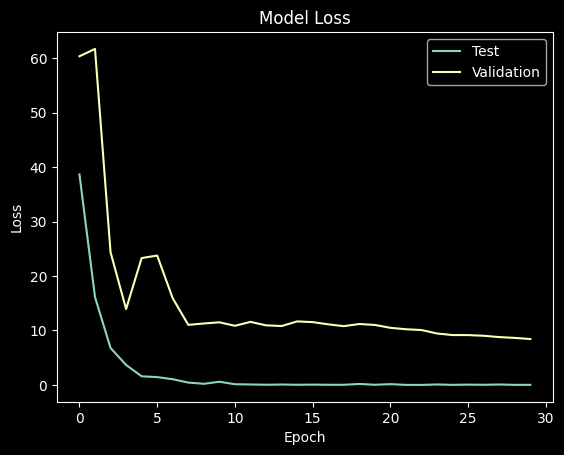

In [50]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Test', 'Validation'], loc='upper right')
plt.show()

## Revisar el modelo

In [51]:
def names(number):
    if number==0:
        return 'tiene tumor'
    else:
        return 'no tiene tumor'

99.68% la seguridad de este resultado es no tiene tumor


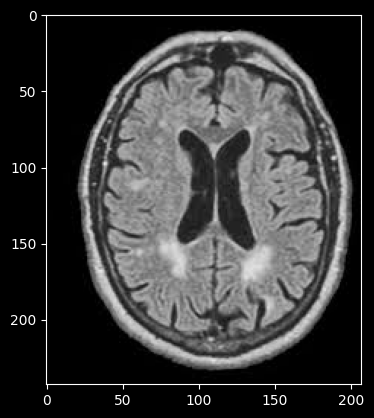

In [52]:
from matplotlib.pyplot import imshow
import numpy as np
from PIL import Image

img = Image.open(r"../input/brain-mri-images-for-brain-tumor-detection/no/22 no.jpg")
img_resized = img.resize((128, 128))
img_array = np.array(img_resized)
img_array_reshaped = img_array.reshape(1, 128, 128, 3)
prediction = model.predict_on_batch(img_array_reshaped)
classification_index = np.argmax(prediction)
imshow(img)
confidence = prediction[0][classification_index] * 100
classification_name = names(classification_index)
print(f"{confidence:.2f}% la seguridad de este resultado es {classification_name}")

In [53]:
%%capture
!pip install gradio

In [54]:
import gradio as gr
from PIL import Image
import numpy as np

def predict_image(img):
    img_resized = img.resize((128, 128))
    img_array = np.array(img_resized)
    img_array_reshaped = img_array.reshape(1, 128, 128, 3)
    prediction = model.predict_on_batch(img_array_reshaped)
    classification_index = np.argmax(prediction)
    confidence = prediction[0][classification_index] * 100
    classification_name = names(classification_index)
    return f"{confidence:.2f}% De confianza que {classification_name}"

# Define la interfaz de Gradio
iface = gr.Interface(
    fn=predict_image,
    inputs=gr.Image(type="pil", label="Upload Image"),
    outputs="text",
    title="Image Classification",
    description="Upload an image and get classification results."
)

# Ejecuta la interfaz
iface.launch()

Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://b3ca2e227dac0e68ca.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)
